In [33]:
import numpy as np
import seaborn as sns
df = sns.load_dataset('iris')

In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
encoder = LabelEncoder()

In [5]:
df['species'] = encoder.fit_transform(df['species'])

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df = df[df['species'] != 0][['sepal_width', 'petal_length','species']]

In [8]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [9]:
import matplotlib.pyplot as plt

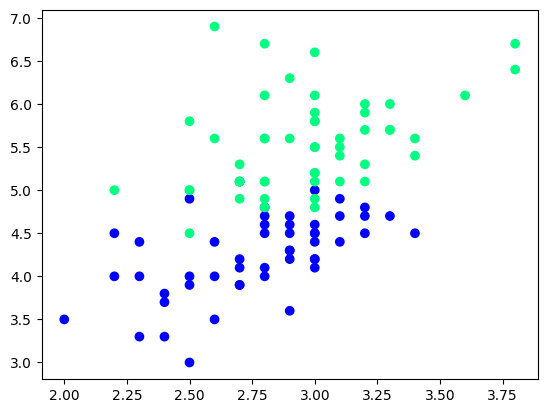

In [10]:
plt.scatter(df['sepal_width'], df['petal_length'], c = df['species'], cmap = 'winter')

In [11]:
# Taking only 10 rows for training
df =df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [52]:
print(df.shape)
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(100, 5)
(10, 3)
(5, 3)
(5, 3)


In [51]:
df_train

,sepal_width,petal_length,species
51,3.2,4.5,1
53,2.3,4.0,1
99,2.8,4.1,1
118,2.6,6.9,2
106,2.5,4.5,2
98,2.5,3.0,1
88,3.0,4.1,1
95,3.0,4.2,1
134,2.6,5.6,2
129,3.0,5.8,2


In [13]:
df_val

,sepal_width,petal_length,species
114,2.8,5.1,2
149,3.0,5.1,2
91,3.0,4.6,1
90,2.6,4.4,1
121,2.8,4.9,2


In [14]:
df_test

,sepal_width,petal_length,species
89,2.5,4.0,1
100,3.3,6.0,2
125,3.2,6.0,2
135,3.0,6.1,2
82,2.7,3.9,1


In [15]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [16]:
X_test

array([[2.8, 5.1],
       [3. , 5.1],
       [3. , 4.6],
       [2.6, 4.4],
       [2.8, 4.9]])

In [17]:
y_test

array([2, 2, 1, 1, 2])

In [18]:
# Data for Tree 1
df_bag = df_train.sample(8, replace = True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
118,2.6,6.9,2
134,2.6,5.6,2
95,3.0,4.2,1
99,2.8,4.1,1
134,2.6,5.6,2
53,2.3,4.0,1
88,3.0,4.1,1
99,2.8,4.1,1


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [22]:
dt_bag1 = DecisionTreeClassifier()

In [25]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf = clf, legend = 2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

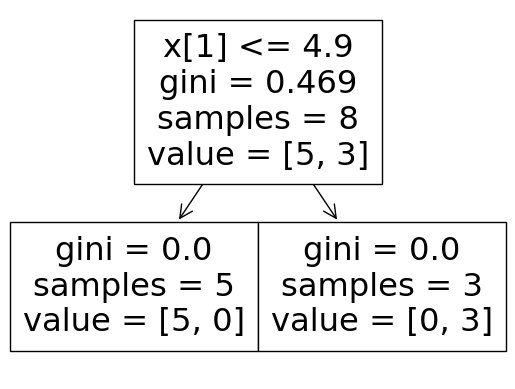

C:\python3.7\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\python3.7\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


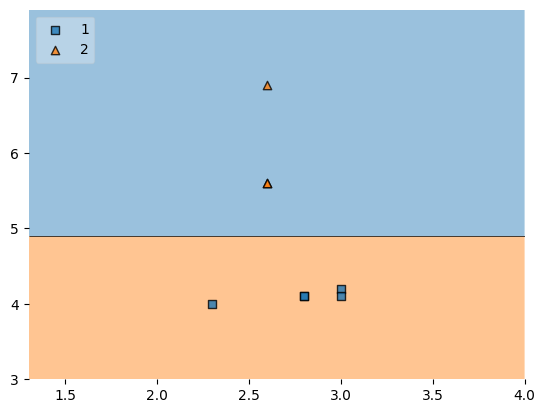

In [26]:
evaluate(dt_bag1, X,y)

In [27]:
# Data for Tree 2
df_bag = df_train.sample(8, replace = True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
99,2.8,4.1,1
51,3.2,4.5,1
98,2.5,3.0,1
134,2.6,5.6,2
88,3.0,4.1,1
95,3.0,4.2,1
118,2.6,6.9,2
88,3.0,4.1,1


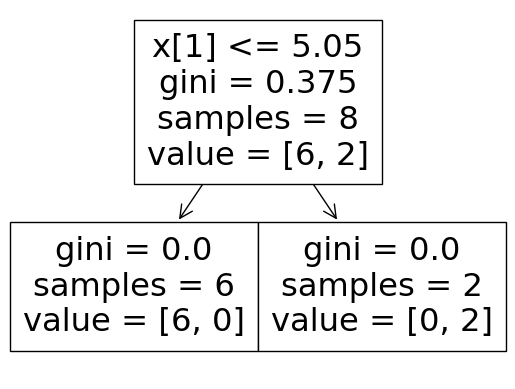

C:\python3.7\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\python3.7\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


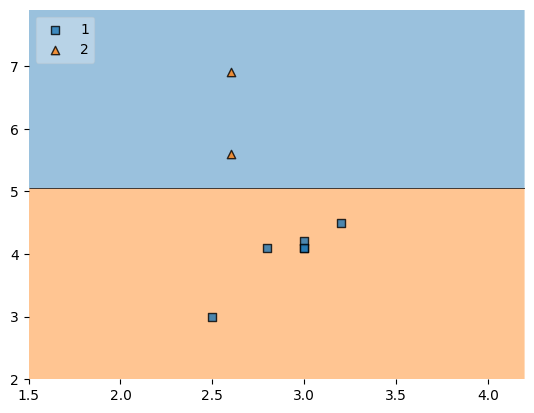

In [28]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2, X,y)

In [29]:
# Data for Tree 3
df_bag = df_train.sample(8, replace = True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
53,2.3,4.0,1
88,3.0,4.1,1
106,2.5,4.5,2
53,2.3,4.0,1
129,3.0,5.8,2
88,3.0,4.1,1
98,2.5,3.0,1
129,3.0,5.8,2


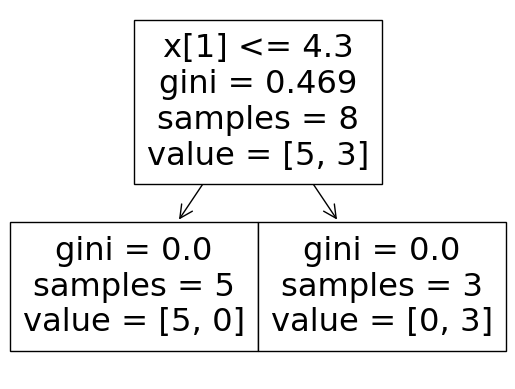

C:\python3.7\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\python3.7\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


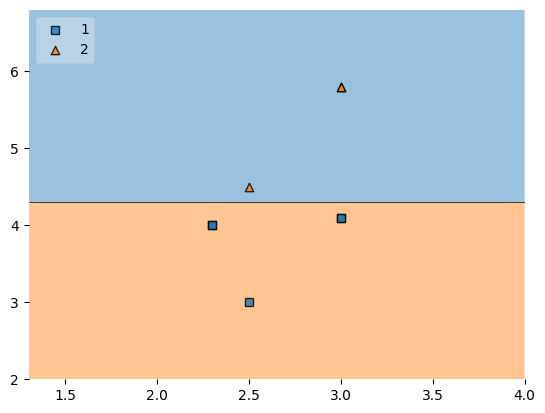

In [30]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3, X,y)

# Prediction

In [31]:
df_test

,sepal_width,petal_length,species
89,2.5,4.0,1
100,3.3,6.0,2
125,3.2,6.0,2
135,3.0,6.1,2
82,2.7,3.9,1


In [37]:
print("Predictor 1: ",dt_bag1.predict(np.array([3.2,	6.0		]).reshape(1,2)))
print("Predictor 2: ",dt_bag2.predict(np.array([3.2	,6.0	]).reshape(1,2)))
print("Predictor 3: ",dt_bag3.predict(np.array([3.2,	6.0	]).reshape(1,2)))


Predictor 1:  [2]
Predictor 2:  [2]
Predictor 3:  [2]


C:\python3.7\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\python3.7\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\python3.7\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [38]:
# Type
# 1. Pasting
# Row sampling without replacement
df_train

,sepal_width,petal_length,species
51,3.2,4.5,1
53,2.3,4.0,1
99,2.8,4.1,1
118,2.6,6.9,2
106,2.5,4.5,2
98,2.5,3.0,1
88,3.0,4.1,1
95,3.0,4.2,1
134,2.6,5.6,2
129,3.0,5.8,2


In [39]:
df_train.sample(8)

,sepal_width,petal_length,species
88,3.0,4.1,1
99,2.8,4.1,1
118,2.6,6.9,2
129,3.0,5.8,2
51,3.2,4.5,1
134,2.6,5.6,2
53,2.3,4.0,1
106,2.5,4.5,2


In [40]:
df1 = sns.load_dataset('iris')
df1.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
15,5.7,4.4,1.5,0.4,setosa
91,6.1,3.0,4.6,1.4,versicolor
143,6.8,3.2,5.9,2.3,virginica
94,5.6,2.7,4.2,1.3,versicolor
84,5.4,3.0,4.5,1.5,versicolor
93,5.0,2.3,3.3,1.0,versicolor
1,4.9,3.0,1.4,0.2,setosa
23,5.1,3.3,1.7,0.5,setosa
127,6.1,3.0,4.9,1.8,virginica


In [45]:
# 2. Random Subspace
df1.sample(2, replace = True, axis = 1)

,species,petal_width
0,setosa,0.2
1,setosa,0.2
2,setosa,0.2
3,setosa,0.2
4,setosa,0.2
...,...,...
145,virginica,2.3
146,virginica,1.9
147,virginica,2.0
148,virginica,2.3


In [46]:
# 3. Randam Patches
df1.sample(8, replace = True).sample(2, replace = True, axis = 1)

,petal_width,petal_length
89,1.3,4.0
139,2.1,5.4
137,1.8,5.5
100,2.5,6.0
102,2.1,5.9
126,1.8,4.8
139,2.1,5.4
60,1.0,3.5
